#### Pipeline

#### Acquire

- get the data into pandas
- look at it
    - describe, info, head, shape
- understand what your data means
    - know what each column is
    - know what your target variable is
#### Wrangle

- clean the data
    - handle nulls
    - handle outliers
    - correct datatypes
- univariate analysis (looking at only one variable)
- encode variables -- Preprocessing
- split into train, validate/, test
- scale data (after train/validate/test split) -- Preprocessing
- document how you're changing the data
#### Explore

- use only train data!
    - use unscaled data
- establish relationships using multivariate analysis
    - hypothesize
    - visualize
    - statistize
    - summarize
- feature engineering
    - when using RFE, use scaled data
#### Model

- use scaled/encoded data
- split into X_variables and y_variables
    - X_train, y_train, X_validate, y_validate, X_test, y_test
- build models
    - make the thing
    - fit the thing (on train)
    - use the thing
- evaluate models on train and validate
- pick the best model and evaluate it on test

# Zillow Project:
## How to predict home value


## Imports

In [1]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import user, password, host
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import os
directory = os.getcwd()

# Data Dictionary


| Feature | Definition |
|:--------|:-----------|
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |

## Acquire
#### - Data acquired from the CodeUp mySQL server, the zillow database was gathered during the Tobias cohort.
#### - Size of data ((65418 rows, 13 columns)
#### - Each row represents a single family home transaction
#### - Each column represents a feature for the transaction

## Zillow data

In [2]:
df_zillow = w.get_zillow_data()
df_zillow.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,lotsizesquarefeet,fips,latitude,longitude,transactiondate,propertylandusedesc,taxvaluedollarcnt,percentile_rank
0,36907,2.0,1.0,660.0,1944.0,3001.0,6037.0,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071.0,0.010007
1,37364,1.0,1.0,660.0,1973.0,83449.0,6037.0,33821400.0,-118187000.0,2017-05-18,Condominium,127105.0,0.010007
2,37527,2.0,1.0,660.0,1948.0,2890.0,6037.0,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152.0,0.010007
3,44968,2.0,1.0,660.0,1952.0,3220.0,6111.0,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907.0,0.010007
4,34820,2.0,1.0,660.0,1924.0,4166.0,6037.0,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516.0,0.010007


In [3]:
df_zillow.shape

(65418, 13)

In [4]:
df_zillow.isnull().sum()

id                              0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
yearbuilt                       0
lotsizesquarefeet               0
fips                            0
latitude                        0
longitude                       0
transactiondate                 0
propertylandusedesc             0
taxvaluedollarcnt               6
percentile_rank                 0
dtype: int64

In [5]:
df_zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
id,65418.0,3.855947e+04,22386.284469,2.000000e+01,1.931525e+04,3.842350e+04,5.726575e+04,7.761200e+04
bedroomcnt,65418.0,3.235226e+00,0.998679,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01
bathroomcnt,65418.0,2.251032e+00,0.884908,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.200000e+01
calculatedfinishedsquarefeet,65418.0,1.774485e+03,753.787812,6.600000e+02,1.236000e+03,1.588000e+03,2.131000e+03,5.057000e+03
yearbuilt,65418.0,1.962263e+03,22.383730,1.808000e+03,1.950000e+03,1.961000e+03,1.978000e+03,2.016000e+03
lotsizesquarefeet,65418.0,2.269777e+04,118941.328188,3.430000e+02,5.764000e+03,7.009000e+03,9.753000e+03,6.971010e+06
fips,65418.0,6.047667e+03,20.820051,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,65418.0,3.402233e+07,238523.338416,3.333960e+07,3.385108e+07,3.402972e+07,3.417742e+07,3.480695e+07
longitude,65418.0,-1.182264e+08,342674.845430,-1.194484e+08,-1.184127e+08,-1.181972e+08,-1.179769e+08,-1.175559e+08
taxvaluedollarcnt,65412.0,4.140246e+05,417276.495570,5.942000e+03,1.884698e+05,3.193645e+05,5.070352e+05,1.472112e+07


# Prepare
#### Prepare

- perform univariate stats
- clean up data
- encode data
- split data

### Prepare Actions:

- Removed columns that did not contain useful information
- Renamed columns to promote readability
- Checked for nulls in the data (there were none)
- Checked that column data types were appropriate
- Added additional features to investigate:
    - ENTER HERE
    - MORE DATA
    - EVEN MORE
    - GOOD ENOUGH?
- Compare categorical variables
- Split data into train(60), validate(20) and test(20) (no stratifying)
- Scale continuous variable
- Outliers within 1% of max or min of square feet (sqft) have been removed for this iteration of the project

In [6]:
df = w.prep_zillow(w.get_zillow_data())
df.head()

,id,bedrooms,bathrooms,sqft,yearbuilt,lot_sqft,county,latitude,longitude,transaction_date,property_class,taxvalue,percentile_rank
0,36907,2,1.0,660,1944,3001,LA,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071,0.010007
1,37364,1,1.0,660,1973,83449,LA,33821400.0,-118187000.0,2017-05-18,Condominium,127105,0.010007
2,37527,2,1.0,660,1948,2890,LA,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152,0.010007
3,44968,2,1.0,660,1952,3220,Ventura,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907,0.010007
4,34820,2,1.0,660,1924,4166,LA,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516,0.010007


In [7]:
df = df.set_index('id')
df.drop(['percentile_rank'], axis=1, inplace=True)
df.head()

,bedrooms,bathrooms,sqft,yearbuilt,lot_sqft,county,latitude,longitude,transaction_date,property_class,taxvalue
id,,,,,,,,,,,
36907,2,1.0,660,1944,3001,LA,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071
37364,1,1.0,660,1973,83449,LA,33821400.0,-118187000.0,2017-05-18,Condominium,127105
37527,2,1.0,660,1948,2890,LA,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152
44968,2,1.0,660,1952,3220,Ventura,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907
34820,2,1.0,660,1924,4166,LA,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516


In [8]:
df['rm_X_sqft'] = round((df['bathrooms'] + df['bedrooms'])/df['sqft'], 6)
df.head()

,bedrooms,bathrooms,sqft,yearbuilt,lot_sqft,county,latitude,longitude,transaction_date,property_class,taxvalue,rm_X_sqft
id,,,,,,,,,,,,
36907,2,1.0,660,1944,3001,LA,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071,0.004545
37364,1,1.0,660,1973,83449,LA,33821400.0,-118187000.0,2017-05-18,Condominium,127105,0.003030
37527,2,1.0,660,1948,2890,LA,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152,0.004545
44968,2,1.0,660,1952,3220,Ventura,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907,0.004545
34820,2,1.0,660,1924,4166,LA,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516,0.004545


In [9]:
df['rm_X_all_sqft'] = round((df['bathrooms'] + df['bedrooms']) / (df['sqft'] + df['lot_sqft']), 6)
df.head()

,bedrooms,bathrooms,sqft,yearbuilt,lot_sqft,county,latitude,longitude,transaction_date,property_class,taxvalue,rm_X_sqft,rm_X_all_sqft
id,,,,,,,,,,,,,
36907,2,1.0,660,1944,3001,LA,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071,0.004545,0.000819
37364,1,1.0,660,1973,83449,LA,33821400.0,-118187000.0,2017-05-18,Condominium,127105,0.003030,0.000024
37527,2,1.0,660,1948,2890,LA,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152,0.004545,0.000845
44968,2,1.0,660,1952,3220,Ventura,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907,0.004545,0.000773
34820,2,1.0,660,1924,4166,LA,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516,0.004545,0.000622


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65412 entries, 36907 to 38353
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          65412 non-null  int64  
 1   bathrooms         65412 non-null  float64
 2   sqft              65412 non-null  int64  
 3   yearbuilt         65412 non-null  int64  
 4   lot_sqft          65412 non-null  int64  
 5   county            65412 non-null  object 
 6   latitude          65412 non-null  float64
 7   longitude         65412 non-null  float64
 8   transaction_date  65412 non-null  object 
 9   property_class    65412 non-null  object 
 10  taxvalue          65412 non-null  int64  
 11  rm_X_sqft         65412 non-null  float64
 12  rm_X_all_sqft     65412 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 7.0+ MB


In [11]:
df.shape

(65412, 13)

In [12]:
df.isnull().sum()

bedrooms            0
bathrooms           0
sqft                0
yearbuilt           0
lot_sqft            0
county              0
latitude            0
longitude           0
transaction_date    0
property_class      0
taxvalue            0
rm_X_sqft           0
rm_X_all_sqft       0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,65412.0,3.235247e+00,0.998677,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01
bathrooms,65412.0,2.251070e+00,0.884915,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.200000e+01
sqft,65412.0,1.774520e+03,753.797263,6.600000e+02,1.236000e+03,1.588000e+03,2.131000e+03,5.057000e+03
yearbuilt,65412.0,1.962263e+03,22.382795,1.808000e+03,1.950000e+03,1.961000e+03,1.978000e+03,2.016000e+03
lot_sqft,65412.0,2.269858e+04,118946.703567,3.430000e+02,5.764000e+03,7.009000e+03,9.753000e+03,6.971010e+06
latitude,65412.0,3.402234e+07,238529.605211,3.333960e+07,3.385108e+07,3.402974e+07,3.417743e+07,3.480695e+07
longitude,65412.0,-1.182264e+08,342677.587149,-1.194484e+08,-1.184128e+08,-1.181972e+08,-1.179769e+08,-1.175559e+08
taxvalue,65412.0,4.140246e+05,417276.495570,5.942000e+03,1.884698e+05,3.193645e+05,5.070352e+05,1.472112e+07
rm_X_sqft,65412.0,3.280685e-03,0.000746,4.150000e-04,2.740000e-03,3.252000e-03,3.788000e-03,1.204800e-02
rm_X_all_sqft,65412.0,5.999251e-04,0.000308,1.000000e-06,4.340000e-04,5.950000e-04,7.510000e-04,2.913000e-03


In [14]:
pd.crosstab(df.property_class, df.county)

county,LA,Orange,Ventura
property_class,,,
Cluster Home,0,0,274
Condominium,6703,186,347
"Duplex (2 Units, Any Combination)",2527,12,7
"Manufactured, Modular, Prefabricated Homes",0,0,27
Mobile Home,40,0,10
Residential General,16,0,0
Single Family Residential,36078,13641,4644
Townhouse,6,0,0
"Triplex (3 Units, Any Combination)",884,6,4


#### too many dates for
        - pd.crosstab(df.property_class, df.transaction_date)

In [15]:
df.county.value_counts(normalize=True)

LA         0.707118
Orange     0.211658
Ventura    0.081224
Name: county, dtype: float64

In [16]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'yearbuilt', 'lot_sqft', 'county',
       'latitude', 'longitude', 'transaction_date', 'property_class',
       'taxvalue', 'rm_X_sqft', 'rm_X_all_sqft'],
      dtype='object')

## Univariate Analysis pre-scaling

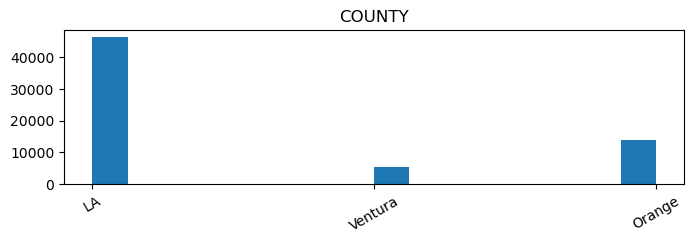

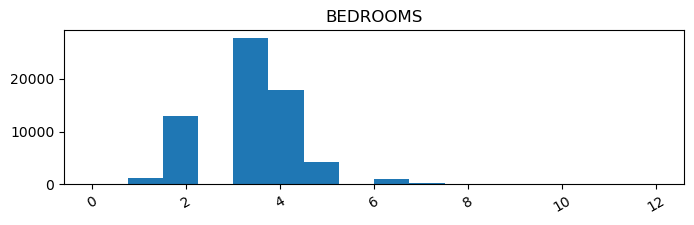

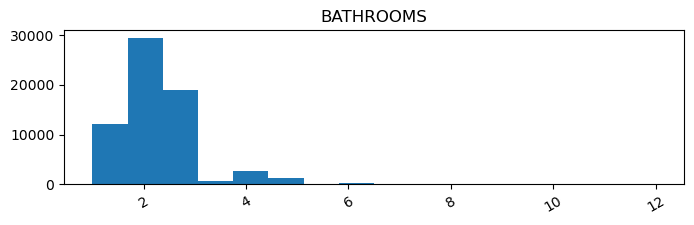

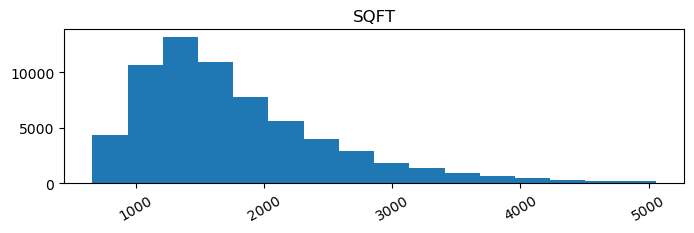

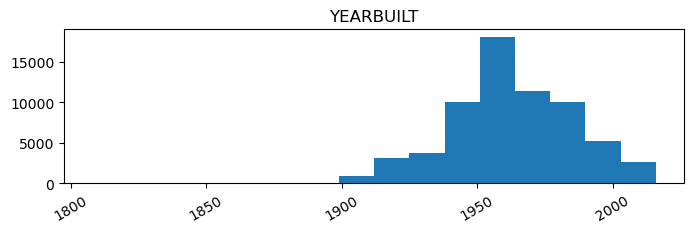

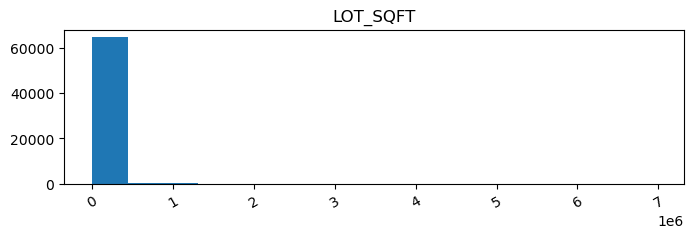

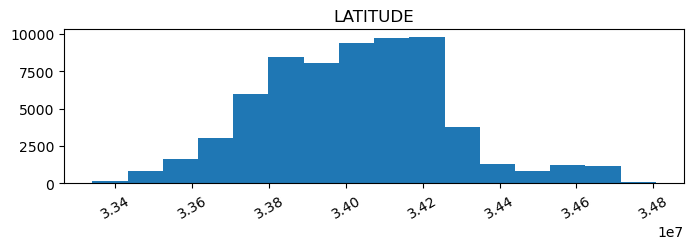

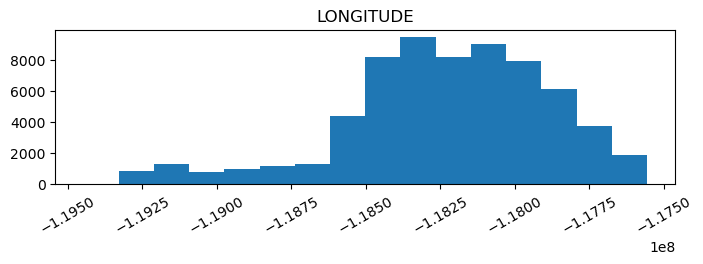

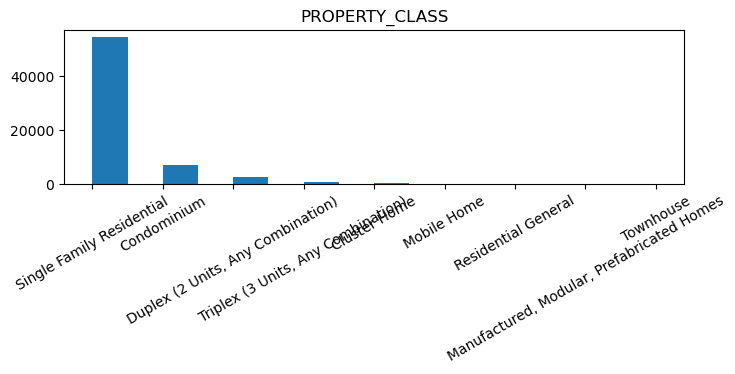

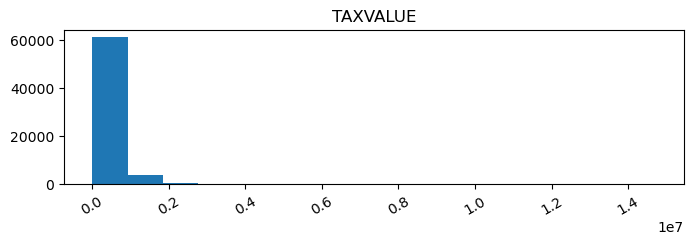

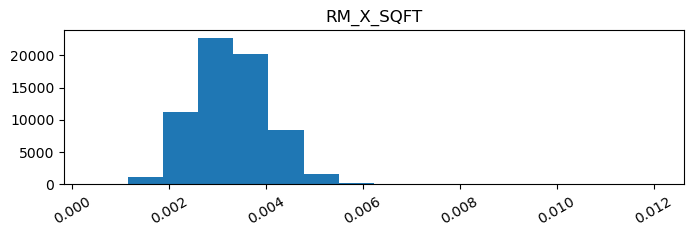

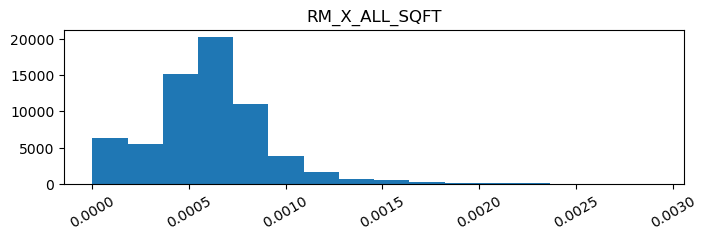

In [17]:
cols = ['county','bedrooms', 'bathrooms', 'sqft', 'yearbuilt', 'lot_sqft',\
        'latitude', 'longitude', 'property_class', 'taxvalue','rm_X_sqft', 'rm_X_all_sqft']

# Set a larger size for individual plots
individual_fig_size = (8, 2)

for col in cols:
    plt.figure(figsize=individual_fig_size)
    plt.title(col.upper()) # Convert title to uppercase
    df[col].hist(bins=16)
    plt.xticks(rotation=30)  # Rotate x-axis labels by 45 degrees
    plt.grid(False)
    plt.show()  # Show each plot individually


> reploting those columns that showed promising signs

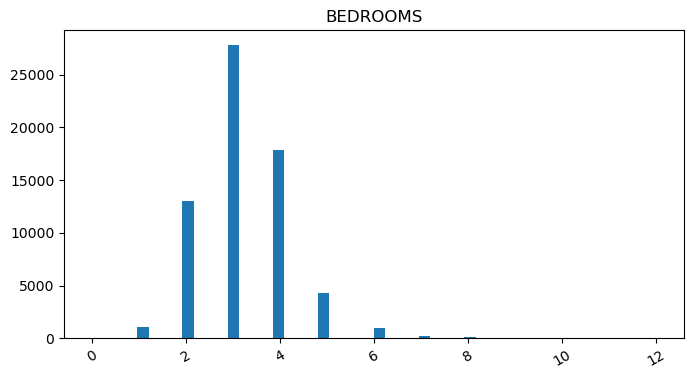

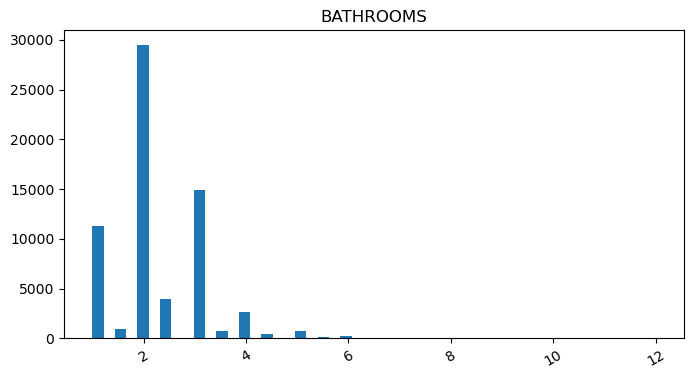

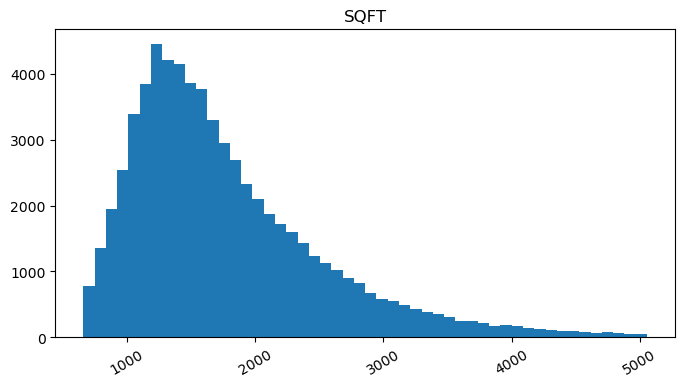

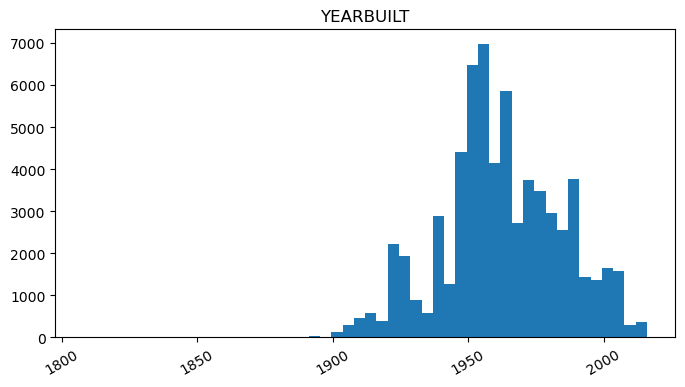

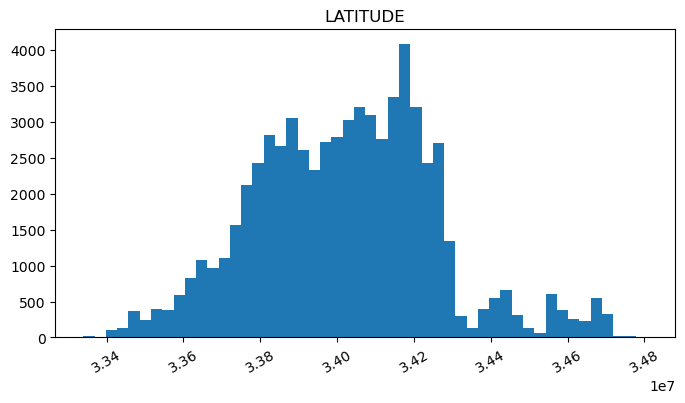

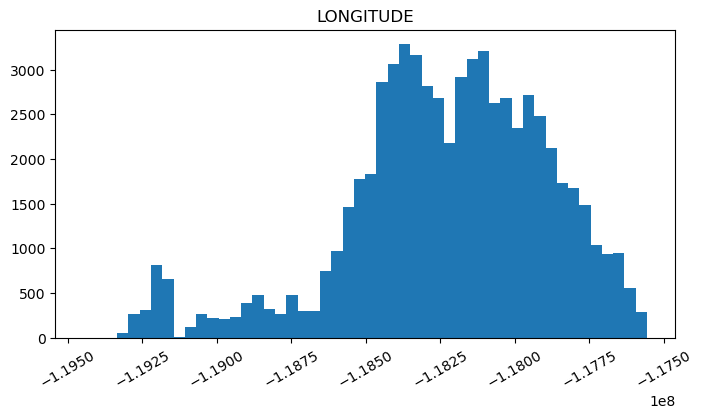

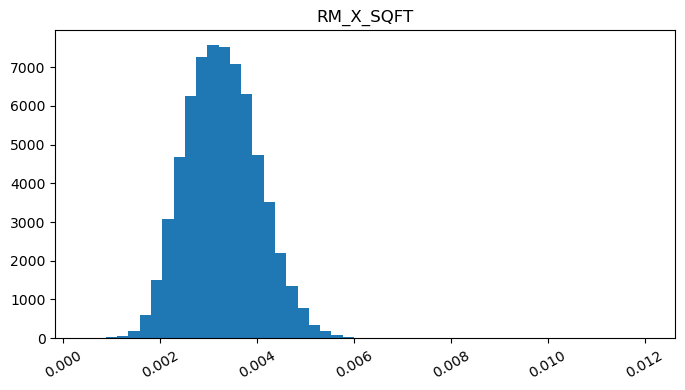

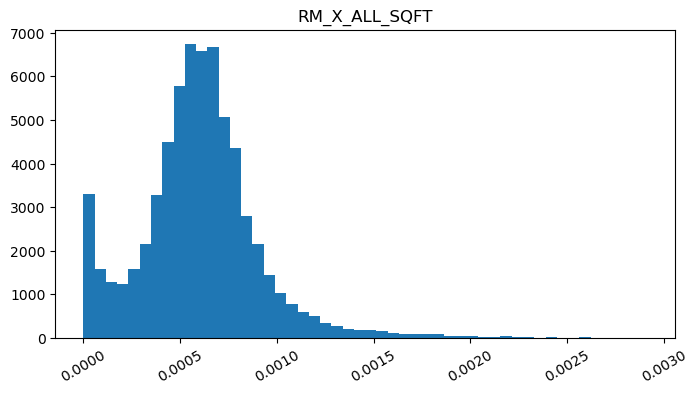

In [18]:
cols = ['bedrooms', 'bathrooms', 'sqft', 'yearbuilt',\
        'latitude', 'longitude','rm_X_sqft', 'rm_X_all_sqft']

# Set a larger size for individual plots
individual_fig_size = (8, 4)

for col in cols:
    plt.figure(figsize=individual_fig_size)
    plt.title(col.upper()) # Convert title to uppercase
    df[col].hist(bins=50)
    plt.xticks(rotation=30)  # Rotate x-axis labels by 45 degrees
    plt.grid(False)
    plt.show()  # Show each plot individually

## Spliting

In [19]:
train, validate, test = w.split_data(df)


    train -> (39247, 13)
    validate -> (13082, 13)
    test -> (13083, 13)


In [20]:
# scale that data!
# separate X and y!
X_train, y_train = train.drop(columns=['taxvalue','county','transaction_date', 'property_class']), train['taxvalue']
X_validate, y_validate = validate.drop(columns=['taxvalue','county','transaction_date', 'property_class']), validate['taxvalue']
X_test, y_test = test.drop(columns=['taxvalue','county','transaction_date', 'property_class']), test['taxvalue']

In [21]:
# make a scaler:
scaler = MinMaxScaler()
# fit and use a scaler:
X_train_scaled = scaler.fit_transform(X_train)
# use only on validate:
X_validate_scaled = scaler.transform(X_validate)
# use only on test:
X_test_scaled = scaler.transform(X_test)

### NOTES:
- only using NON-NULLs
- removed 1% of top and bottom (2% total) values using the feature ranking 'sqft' as to remove possible human error in istances where '0' or an exaggerated number was imputed for the 'sqft' feature.
- I created a feature (column) named 'rm_X_qft' as a result of dividing ('bedrooms' and 'bathrooms') by 'sqft'
- I created a feature (column) named 'rm_X_all_sqft' as a result of dividing ('bedrooms'+'bathrooms') by ('sqft'+'lot_sqft')